In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
# Polynomial
def f0_poly3_f0asPi(f0, q1, q2, l, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -l**2 + 2*l*(1-l)
    b = l**2 + l*(r1+r2) - (1-l)*(r1+r2)
    c = -l*(r1 + r2) - r1*r2
    d = r1*r2
    return a*f0**3 + b*f0**2 + c*f0 + d

# ----------------------- Solution to the polynomial ------------------------------
def f0_poly3_sols_f0asPi(q1, q2, l, mu):
    # r1, r2 = 1/q1, 1/q2
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # global pi1, pi2, q1, q2, r1, r2, l
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -l**2 + 2*l*(1-l)
    b = l**2 + l*(r1+r2) - (1-l)*(r1+r2)
    c = -l*(r1 + r2) - r1*r2
    d = r1*r2
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            root0 = complex(0,math.sqrt(-1*radicand0))
        else:
            root0 = complex(math.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, math.sqrt(3))/2
    f0_roots, f0_roots_abs = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        f0_roots.append(f0_root), f0_roots_abs.append(abs(f0_root))
    return f0_roots_abs


# ----------------------- Rest of the populations ------------------------------
def f_i(i, f0, qs, l, mu):
    # global qs, rs, pis, l
    # rs = [1/q for q in qs]
    K, q0 = qs[-1], 1.0
    rs = [q0*(mu/K + (1-mu)/q) for q in qs]
    try:
        fi = (1-l)*f0**2/(rs[i-1]-l*f0)
    except ZeroDivisionError:
        fi = float('nan') 
    # return (1-l)*pis[i-1]/(rs[i-1]/f0-l)
    return fi

In [21]:
q1, q2 = 9.0, 10.0
l = 0.6
mu = 0.0
f0s = f0_poly3_sols_f0asPi(q1, q2, l, mu)
# print(f0s)

for f0 in f0s:
    fs = [f_i(i, f0, (q1, q2), l, mu) for i in range(1,3)]
    print(f0, *fs)

3.6714447853367407 -2.5776444973079196 -2.5640247599832446
0.1775517436467796 2.7532030398437475 -1.9307547834898122
0.1420411898381092 0.31175755279223216 0.5462012573695925


In [19]:
f0vals = np.arange(0.0,1.001,0.001)
f0polyVals = f0_poly3_f0asPi(f0vals, q1, q2, l, mu)

[(-0.05, 0.05)]

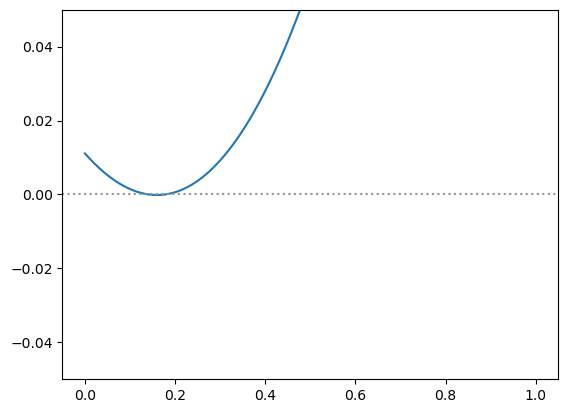

In [20]:
fig, ax = plt.subplots()
ax.plot(f0vals, f0polyVals)
ax.axhline(0.0, 0, 1, ls=':', color='xkcd:gray')
ax.set(ylim=(-0.05,0.05))